In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [154]:
trash_data = pd.read_csv('data/final_trash_data.csv')
trash_data['Tonnage'] = pd.to_numeric(trash_data['Tonnage'].str.replace(',', '.'))
trash_data['Yard'] = pd.Categorical(trash_data['Yard'])
trash_data['Yard'] = trash_data['Yard'].cat.codes

trash_data['Type'] = pd.Categorical(trash_data['Type'])
trash_data['Type'] = trash_data['Type'].cat.codes

df_trash_date = trash_data.groupby('Date').sum()
df_high_tonnage = df_trash_date[df_trash_date['Tonnage'] > 5500]

trash_data_wOutliers = trash_data[~trash_data['Date'].isin(df_high_tonnage.index)]

trash_data_wOutliers.drop(columns=['Bundesland'], inplace=True)
trash_data_wOutliers.drop(columns=['Date'], inplace=True)

original_columns = ['Month','CW','Year','Yard','Shift','Tour','Tonnage','Type']
curr_columns = [
 'Month',
 'CW',
 'Year',
 'SPM Sammlung',
 'Tonnage',
 'Tour_7',
 'Tour_8',
 'Tour_3',
 'Shift',
 'Tour_12',
 'VMWSN',
 'Tour',
 'Tour_10',
 'Tour_1',
 'Tour_2',
 'VMWSF',
 'weekday_Tuesday',
 'HM',
 'BIO',
 'Tour_4',
 'Tour_5',
 'Tour_9',
 'weekday_Monday',
 'Tour_Stays',
 'avg_temperature_2d_before','avg_temperature_3d_before','precipitation','precipitation_1d_before','precipitation_2d_before','precipitation_3d_before', 'is_holiday']

reduced_trash_data = trash_data_wOutliers

reduced_trash_data.set_index('Month', inplace=True)

reduced_trash_data.head(100)

/var/folders/ly/yrh20f8943922j4ynv6m68700000gn/T/ipykernel_42439/1287990773.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trash_data_wOutliers.drop(columns=['Bundesland'], inplace=True)
/var/folders/ly/yrh20f8943922j4ynv6m68700000gn/T/ipykernel_42439/1287990773.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trash_data_wOutliers.drop(columns=['Date'], inplace=True)


,CW,Year,Yard,Shift,Tour,Tonnage,Type,Tour_Stays,avg_temperature,avg_temperature_1d_before,...,weekday_Thursday_lag_3,weekday_Friday_lag_1,weekday_Friday_lag_2,weekday_Friday_lag_3,weekday_Saturday_lag_1,weekday_Saturday_lag_2,weekday_Saturday_lag_3,weekday_Sunday_lag_1,weekday_Sunday_lag_2,weekday_Sunday_lag_3
Month,,,,,,,,,,,,,,,,,,,,,
1,1,2019,0,1,1,5.59,0,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,0,1,4,3.23,0,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,0,1,5,5.68,0,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,0,1,6,5.48,0,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,0,1,7,7.84,0,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,2019,1,1,30,19.64,1,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,1,1,31,20.16,1,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,1,1,32,37.26,1,2159841.0,1.8,6.4,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# Aufteilen der Daten in Trainings-, Test- und Validierungs-Sets
X = reduced_trash_data.drop('Tonnage', axis=1)
y = reduced_trash_data['Tonnage']

X.head()
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [172]:
# Training eines linearen Modells

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [170]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV für DecisionTreeRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {np.sqrt(-grid_search.best_score_)}')

KeyboardInterrupt: 

In [157]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [158]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [159]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [173]:
from sklearn.metrics import classification_report

# Evaluierung der Modelle
models = {'RFR': rf_reg,
          #'DTR': dtree_reg, 'SGD': sgd_reg, 'LR': linear_reg
}

for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f'{name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}')

RFR - RMSE: 3.0943573155634363, MAE: 2.1267839766733, R²: 0.7075959661027306


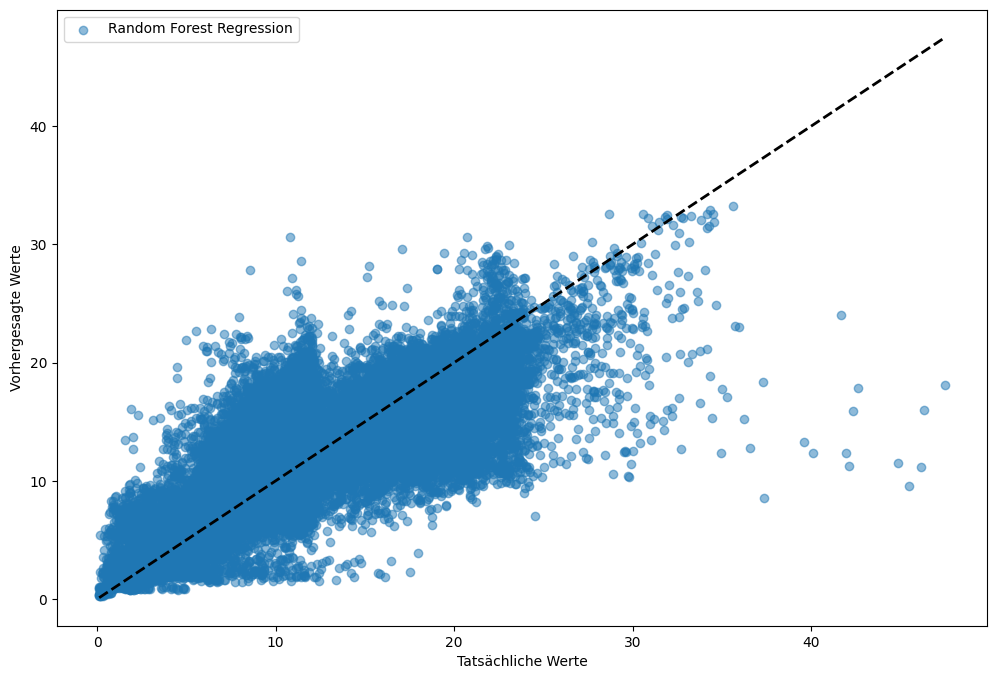

In [174]:
plt.figure(figsize=(12, 8))
plt.scatter(y_val, rf_reg.predict(X_val), alpha=0.5, label='Random Forest Regression')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.legend()
plt.show()

In [175]:
importances = rf_reg.feature_importances_

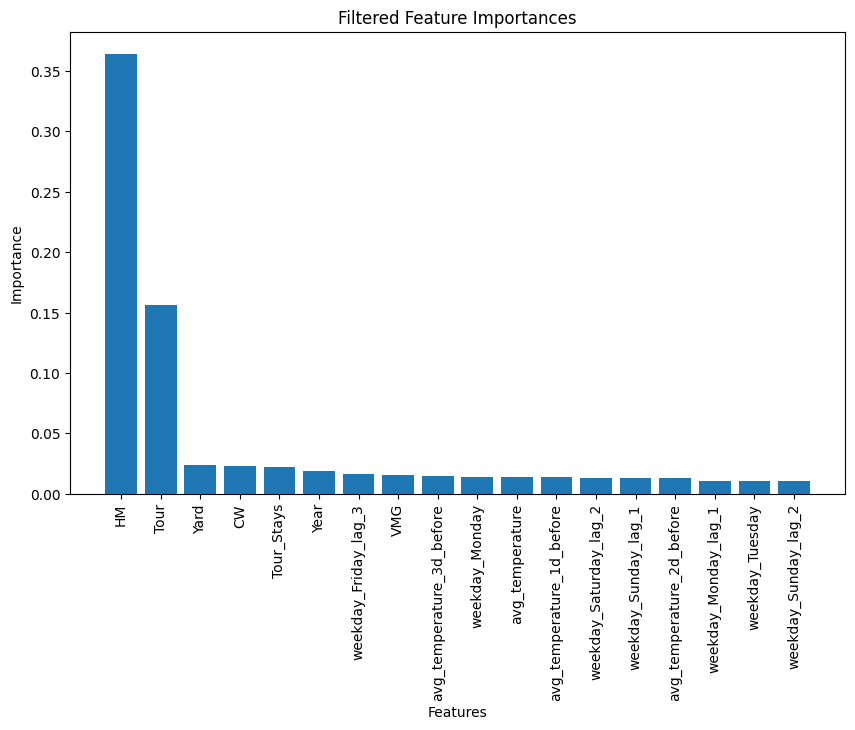

In [176]:
# Set the importance threshold
importance_threshold = 0.01

# Identify indices where importance is greater than the threshold
important_indices = np.where(importances >= importance_threshold)[0]

# Sort the important feature importances indices in descending order
sorted_indices = important_indices[np.argsort(importances[important_indices])[::-1]]

# Filter both the importances and feature names based on the threshold
filtered_importances = importances[sorted_indices]
filtered_names = X.columns[sorted_indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Filtered Feature Importances")
plt.bar(range(len(filtered_importances)), filtered_importances)
plt.xticks(range(len(filtered_importances)), filtered_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()